<a href="https://colab.research.google.com/github/gabrielcn/Bike_Sharing/blob/main/cyclistic_bike_share_new_york.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Compartilhamento de bicicletas em NY - 2016 (Citibike)***


In [ ]:
import pandas as pd #Importa a biblioteca pandas para ler o arquivo
import seaborn as sns #Importa a biblioteca seaborn
import matplotlib.pyplot as plt #Importa a bilbioteca matplotlib
import csv 
from datetime import datetime #operações para analisar datas

In [ ]:
df_ny = pd.read_excel("NYC-2016-Summary.xlsx") #Atribui a uma variável 

In [ ]:
df_ny

,duration,month,hour,day_of_week,user_type
0,1.398333e+16,1,0,Friday,Customer
1,1.143333e+16,1,0,Friday,Subscriber
2,5.250000e+00,1,0,Friday,Subscriber
3,1.231667e+16,1,0,Friday,Subscriber
4,2.088333e+16,1,0,Friday,Customer
...,...,...,...,...,...
276793,4.916667e+15,12,22,Saturday,Customer
276794,4.616667e+15,12,22,Saturday,Subscriber
276795,1.001667e+16,12,23,Saturday,Subscriber
276796,3.503333e+15,12,23,Saturday,Subscriber


In [ ]:
df_ny.shape #Formato da tabela

(276798, 5)

In [ ]:
df_ny.columns = ["duracao" , "mes" , "hora" , "dia_semana", "tipo_usuario"] #renomear colunas [] lista (columns é um atributo do pandas)
df_ny.head()

,duracao,mes,hora,dia_semana,tipo_usuario
0,1.398333e+16,1,0,Friday,Customer
1,1.143333e+16,1,0,Friday,Subscriber
2,5.250000e+00,1,0,Friday,Subscriber
3,1.231667e+16,1,0,Friday,Subscriber
4,2.088333e+16,1,0,Friday,Customer


In [ ]:
df_ny['mes'].unique() #Todos os valores que foram colocados na coluna mes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
df_ny['mes'].value_counts() #Quantas vezes em cada mes

9     32699
10    31519
8     31104
6     29242
7     27522
5     24455
11    24148
4     20160
3     18413
12    16186
2     11170
1     10180
Name: mes, dtype: int64

In [ ]:
df_ny['dia_semana'].value_counts() #Quantas vezes em cada dia

Wednesday    44629
Thursday     44330
Tuesday      42405
Friday       41389
Monday       39340
Saturday     33353
Sunday       31352
Name: dia_semana, dtype: int64

**Quantidade de viagens por dia no ano de 2016**

In [ ]:
qtd_viagem_por_dia_ny = df_ny['dia_semana'].value_counts() #NY

In [ ]:
qtd_viagem_por_dia_ny

Wednesday    44629
Thursday     44330
Tuesday      42405
Friday       41389
Monday       39340
Saturday     33353
Sunday       31352
Name: dia_semana, dtype: int64

In [ ]:
qtd_viagem_por_dia_ny.to_frame()

,dia_semana
Wednesday,44629
Thursday,44330
Tuesday,42405
Friday,41389
Monday,39340
Saturday,33353
Sunday,31352


In [ ]:
df_qtd_viagem_por_dia_ny = qtd_viagem_por_dia_ny.to_frame().reset_index()

In [ ]:
df_qtd_viagem_por_dia_ny #Quantidade total de viagens por dia em 2016

,index,dia_semana
0,Wednesday,44629
1,Thursday,44330
2,Tuesday,42405
3,Friday,41389
4,Monday,39340
5,Saturday,33353
6,Sunday,31352


In [ ]:
df_qtd_viagem_por_dia_ny.columns = ["dias", "total"]
df_qtd_viagem_por_dia_ny

,dias,total
0,Wednesday,44629
1,Thursday,44330
2,Tuesday,42405
3,Friday,41389
4,Monday,39340
5,Saturday,33353
6,Sunday,31352


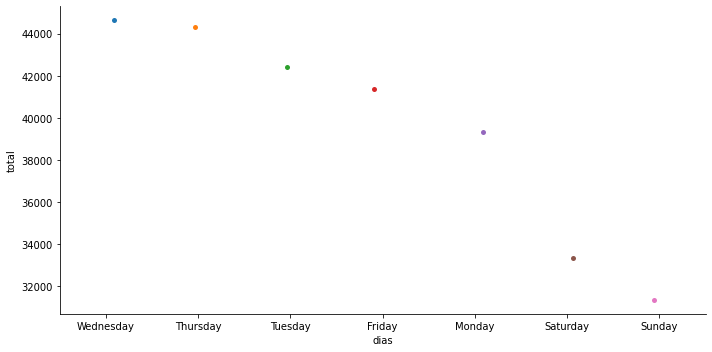

In [ ]:
sns.catplot(x="dias", y="total", data = df_qtd_viagem_por_dia_ny, aspect = 2)

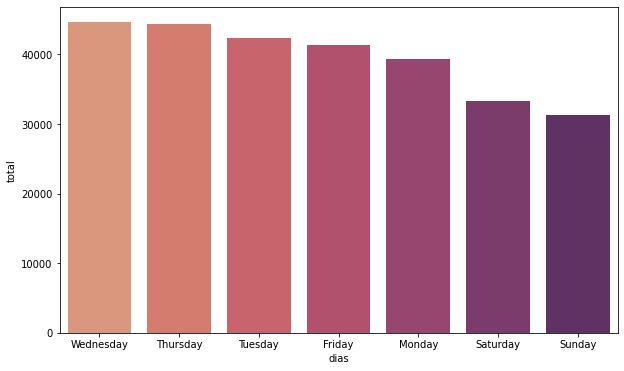

In [ ]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="dias", y="total", data = df_qtd_viagem_por_dia_ny, palette = "flare") #pallete, atributo que permite escolher um palete de cor, no caso é flare